In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC,SVC,SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, LogisticRegression, Perceptron
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [196]:
train = pd.read_csv("/Users/apple/Downloads/train.csv")
test = pd.read_csv("/Users/apple/Downloads/train.csv")

In [197]:
train.head()
train.info()
train.describe()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [198]:
#Looking at correlations
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [199]:
#Group by different attributes by survived - correlation
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [200]:
train[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [201]:
train[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [202]:
#Map categorical value to numerical
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

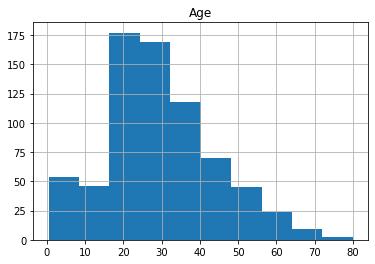

In [203]:
#Data Visualisation
#Age distribution
train.hist(["Age"]) #Most passengers aged between 20-35

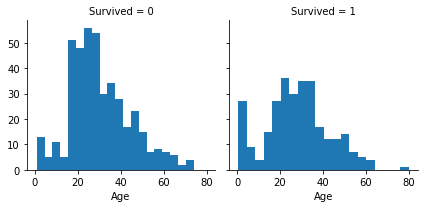

In [204]:
#Age distribution and Survived
g = sns.FacetGrid(train,col="Survived")
g.map(plt.hist,"Age",bins=20) #Different age band has different survided rate - may divided age into groups

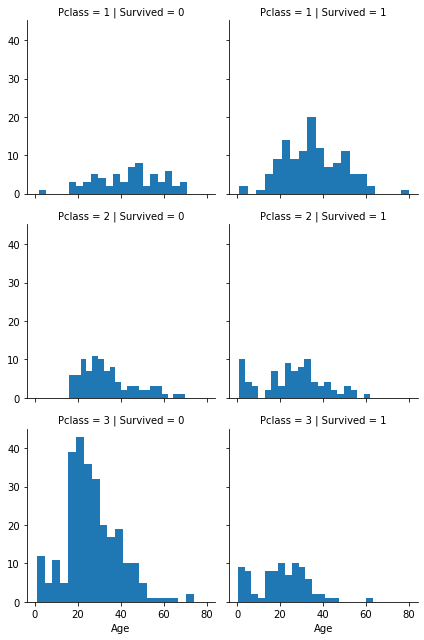

In [205]:
#Age, PClass and Survived
g1 = sns.FacetGrid(train,col="Survived",row="Pclass")
g1.map(plt.hist,"Age",bins=20) #Pclass3: most didn't survive - use Pclass as input


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


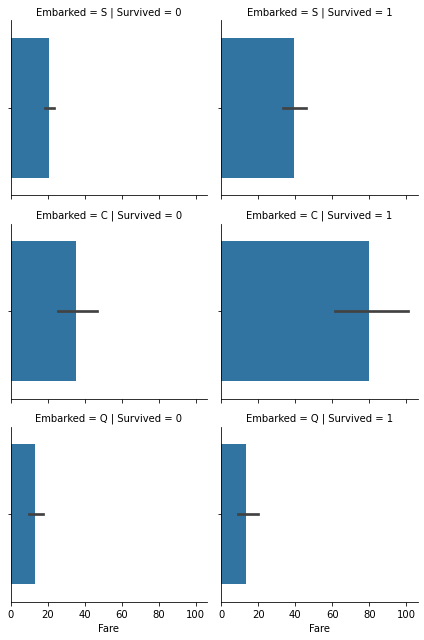

In [206]:
#Fare and Survived
g3 = sns.FacetGrid(train,col="Survived",row="Embarked")
g3.map(sns.barplot,"Fare") #Add fare to input

In [207]:
train = train.drop(["Ticket","Cabin"],axis=1)
test = test.drop(["Ticket","Cabin"],axis=1)

In [208]:
#Title extraction
for dataset in (train,test):
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

#replace to normal title
for dataset in (train,test):
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

#Covert category to ordinal variable
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in (train,test):
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [209]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)

In [210]:
#Covert sex to 0,1
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [211]:
#Missing value of age
#More accurate way of guessing missing values is to use other correlated features. 
#In our case we note correlation among Age, Gender, and Pclass. 
#Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. 
#So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on
guess_age = np.zeros((2,3))
guess_age

for dataset in (train,test):
    for i in range(0,2):
        for j in range(0,3):
            guess = dataset[dataset["Sex"] == i & (dataset["Pclass"] == j+1)]["Age"].dropna().median()
            guess_age[i,j] = guess
            
for dataset in (train,test):
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[
                (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_age[i,j]
    dataset['Age'] = dataset['Age'].astype(int)


In [212]:
#Divide age into different bands
train["AgeBand"] = pd.cut(train["Age"],bins = [-1,8,16,24,32,np.inf],labels=[0,1,2,3,4]).astype(float)
test["AgeBand"] = pd.cut(test["Age"],bins = [-1,8,16,24,32,np.inf],labels=[0,1,2,3,4]).astype(float)

In [213]:
#AgeBand and Survived grouped by AgeBand
train[["AgeBand","Survived"]].groupby(["AgeBand"]).mean().sort_values(by="AgeBand",ascending=False)

for dataset in (train,test):
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)
test.info()

corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

train = train.drop(["Age"],axis=1)
test = test.drop(["Age"],axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    int64  
 10  AgeBand      891 non-null    float64
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [214]:
#Deal with missing value of Embarked
train["Embarked"].value_counts()
port = train["Embarked"].dropna().mode()[0]
train["Embarked"]=train["Embarked"].fillna(port)
test["Embarked"]=test["Embarked"].fillna(port)

train[["Embarked","Survived"]].groupby(["Embarked"]).mean().sort_values(by="Survived",ascending=False)

for dataset in (train,test):
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [215]:
train["FareBand"] = pd.cut(train["Fare"],bins=[-5,8,14,31,np.inf],labels=[0,1,2,3]).astype(np.int)
test["FareBand"] = pd.cut(test["Fare"],bins=[-5,8,14,31,np.inf],labels=[0,1,2,3]).astype(np.int)

<ipython-input-215-86af2142d9a8>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train["FareBand"] = pd.cut(train["Fare"],bins=[-5,8,14,31,np.inf],labels=[0,1,2,3]).astype(np.int)
<ipython-input-215-86af2142d9a8>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

In [216]:
train[["FareBand","Survived"]].groupby(["FareBand"]).mean().sort_values(by="FareBand",ascending=False)

x_train = train.drop(["Survived","Fare","Parch"],axis=1)
y_train = train["Survived"].copy()

x_test = test.drop(["Survived","Fare","Parch"],axis=1)
y_test = test["Survived"].copy()

In [217]:
#Build model
#1. SVM
#2. Logistic Regression
#3. Decision Tree
#4. Random Forest
#5. Naive Bayes
#6. KNN

def accuracy_model(model,x,y,cv=5):
    acc = cross_val_score(model,x,y,cv=cv,scoring="accuracy")
    return acc.mean()

######################
#########SVM##########
######################
#1.1 Linear SVM
lin_svc = SVC(probability=True)
lin_svc.fit(x_train,y_train)
acc_svc = round(lin_svc.score(x_train, y_train) * 100, 2)
acc_svc

83.39

In [218]:
#1.2 Poly kernel SVM
poly_svm = SVC(kernel="poly",degree=2,coef0=1,C=5,probability=True)
poly_svm.fit(x_train,y_train )

#######################################
#########Logistic Regression##########
######################################
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

####################
#######KNN##########
####################
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

###########################
#######Perceptron##########
###########################

perceptron = Perceptron()
perceptron.fit(x_train,y_train)

###########################
#########Random Forest#####
###########################
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)

###########################
#######Decision Tree#######
###########################
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

models = [lin_svc,poly_svm,log_reg,knn,perceptron,rf,tree]
names = ["LinearSVC","PolySVM","LogisticRegression","KNN","Perceptron","RandomForest","DecisionTree"]
scores = [0,0,0,0,0,0,0]

for i in range(len(models)):
    model = models[i]
    name = names[i]
    scores[i] = accuracy_model(model,x_train,y_train,cv=5)
    
#Model Evaluation

models_eva = pd.DataFrame({
    'Model': names,
    'Score': scores})
                               
models_eva.sort_values(by='Score', ascending=False)

,Model,Score
0,LinearSVC,0.828259
1,PolySVM,0.826018
2,LogisticRegression,0.806961
5,RandomForest,0.802486
3,KNN,0.793547
6,DecisionTree,0.790139
4,Perceptron,0.653481


In [219]:
#Hyperparameter tune


In [220]:
for name,score in zip(list(x_train),rf.feature_importances_):
    print(name,score)

Pclass 0.13166396547616208
Sex 0.19584457405262498
SibSp 0.05812859920153015
Embarked 0.053955430763002826
Title 0.25087552516765965
AgeBand 0.10625005418931989
FamilySize 0.1055140783365905
FareBand 0.09776777281311003


In [236]:
#Intestigate Ensemble Learning

#Bagging
bag_tree = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 500,bootstrap=True,n_jobs=-1,max_samples=100)
bag_svm = BaggingClassifier(SVC(),n_estimators = 500,bootstrap=True,n_jobs=-1,max_samples=600)
bag_log = BaggingClassifier(LogisticRegression(),n_estimators = 100,bootstrap=True,n_jobs=-1,max_samples=600)

#Vote
vote_clf = VotingClassifier([("lr",log_reg),("svm",poly_svm),("linsvc",lin_svc),("rf",rf)],voting="soft")

#AdaBoost
ada_clf = AdaBoostClassifier(
                              DecisionTreeClassifier(max_depth=1),n_estimators=200,
                              algorithm = "SAMME.R",learning_rate = 0.5
)
ada_clf.fit(x_train,y_train)

#GradientBoost
gbr = GradientBoostingClassifier(max_depth=2,n_estimators=50,learning_rate=1)
gbr.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=50)

In [237]:
models = [bag_log,bag_tree,bag_svm,vote_clf,ada_clf,gbr]
names = ["LRBagging","DecisionTreeBagging","SVMBagging","Voting Ensemble","AdaBoost","GradientBoost"]
scores = [0,0,0,0,0,0]

for i in range(len(models)):
    model = models[i]
    name = names[i]
    scores[i] = accuracy_model(model,x_train,y_train,cv=5)
    
#Model Evaluation

models_eva = pd.DataFrame({
    'Model': names,
    'Score': scores})
                               
models_eva.sort_values(by='Score', ascending=False)

,Model,Score
2,SVMBagging,0.829383
3,Voting Ensemble,0.824895
1,DecisionTreeBagging,0.822660
4,AdaBoost,0.812567
0,LRBagging,0.804727
5,GradientBoost,0.802505
